In [1]:
import napari
from napari_brainbow_diagnose import DensityWidget
from napari_brainbow_diagnose import fetch_chroms_data
import numpy as np

bb = fetch_chroms_data()
viewer = napari.Viewer()

layer_r = viewer.add_image(bb[:,0], name="red", colormap='red', blending='additive')
layer_g = viewer.add_image(bb[:,1], name="green", colormap='green', blending='additive')
layer_b = viewer.add_image(bb[:,2], name="blue", colormap='blue', blending='additive')
viewer.layers.link_layers([layer_r, layer_g, layer_b])

In [19]:
from skimage.segmentation import slic
from skimage import data, segmentation, color

to_slic = np.moveaxis(bb, 1, -1)
to_slic = to_slic[0:5]

slic_img = slic(to_slic, n_segments=int(to_slic.size / 80), compactness=11, spacing=[3, 1, 1])
# viewer.add_labels(slic_img)
out1 = color.label2rgb(slic_img, to_slic, kind='avg', bg_label=0)
slic_r = viewer.add_image(out1[...,0], name="red", colormap='red', blending='additive')
slic_g = viewer.add_image(out1[...,1], name="green", colormap='green', blending='additive')
slic_b = viewer.add_image(out1[...,2], name="blue", colormap='blue', blending='additive')
viewer.layers.link_layers([slic_r, slic_g, slic_b])

slic_img.shape, np.unique(slic_img).shape

((5, 251, 256), (12824,))

In [3]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt



g = graph.rag_mean_color(to_slic, slic_img)

In [17]:
np.unique(out1), out1.shape

(array([    0,  1106,  1210, ..., 49641, 51313, 61452], dtype=uint16),
 (5, 251, 256, 3))

1000
2000
3000
4000
5000
6000


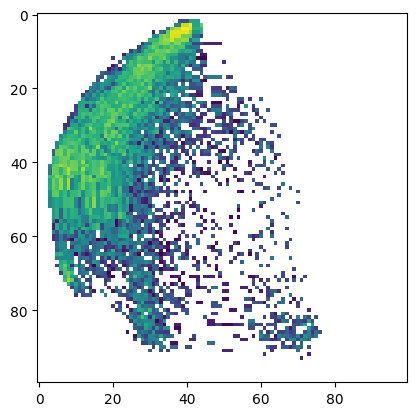

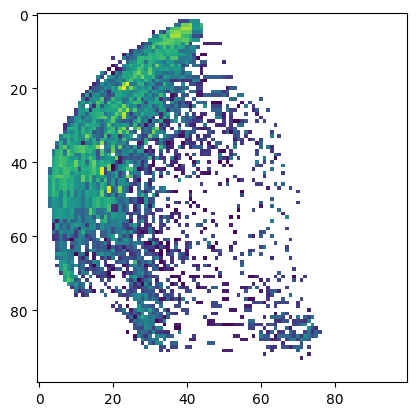

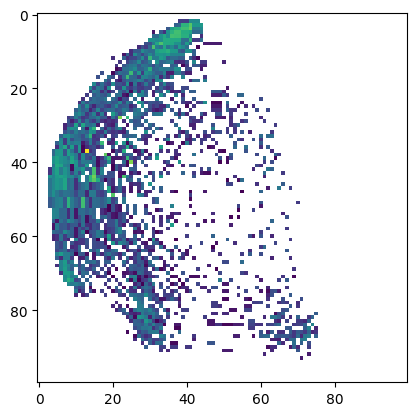

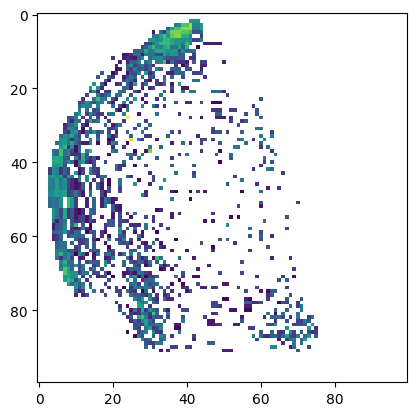

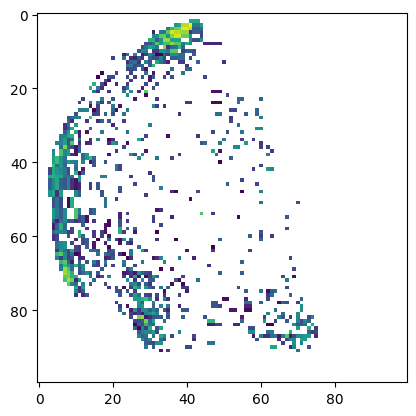

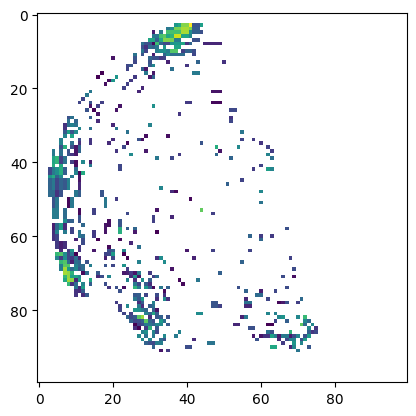

In [18]:
from napari_brainbow_diagnose._channel_density import create_density_wheel
import matplotlib.pyplot as plt
import matplotlib.colors as colors

for threshold in [1000, 2000, 3000, 4000, 5000, 6000]:
    print(threshold)
    gg = g.copy()
    label = graph.cut_threshold(slic_img, gg, threshold)
    out1 = color.label2rgb(label, to_slic, kind='avg', bg_label=0)
    wheel = create_density_wheel(out1, 100, channel_index=-1)
    plt.figure()
    plt.imshow(wheel, norm=colors.LogNorm())
    viewer.add_labels(label)
    

In [5]:
g = graph.rag_mean_color(to_slic, slic_img)

In [6]:
weights = [w for n1, n2, w in g.edges(data='weight')]

In [7]:
np.mean(weights), np.median(weights), np.std(weights), np.max(weights), np.min(weights)

(8451.848039631517,
 7007.909625023714,
 5850.329432805272,
 53844.958979162126,
 95.39637786330637)

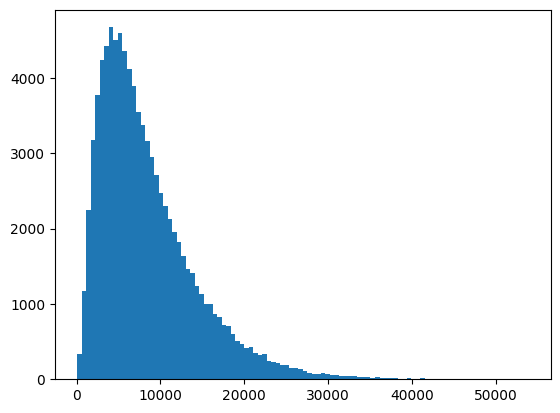

In [8]:

plt.figure()
hist = plt.hist(weights, bins=100)


In [22]:
np.percentile(weights, 40)

5809.647625031061

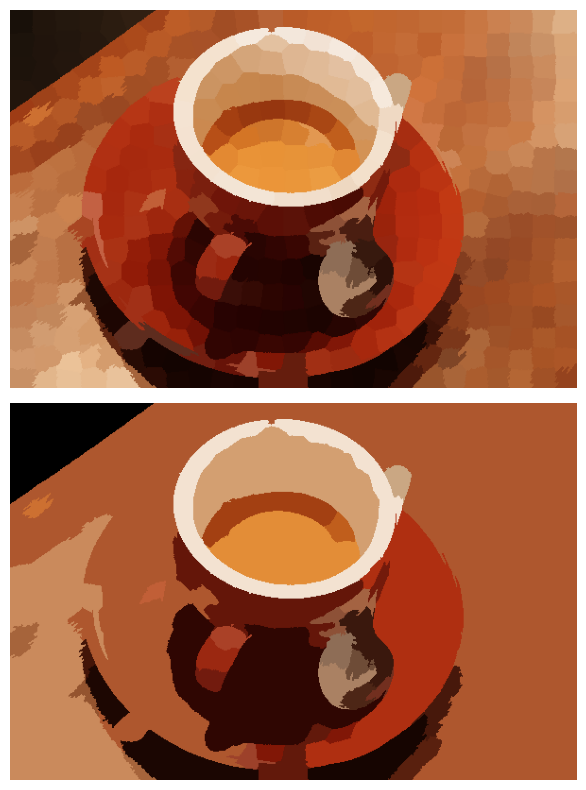

In [73]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1)
labels2 = graph.cut_threshold(labels1, g, 29)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,
                       figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [74]:
g.adj

AdjacencyView({1: {2: {'weight': 10.932739043816541}, 38: {'weight': 5.0288042451021475}}, 2: {1: {'weight': 10.932739043816541}, 3: {'weight': 3.78641386075886}, 30: {'weight': 1.1951937785921962}, 38: {'weight': 5.949391553471935}, 47: {'weight': 1.9086435450135193}}, 3: {2: {'weight': 3.78641386075886}, 4: {'weight': 2.179093277076036}, 30: {'weight': 2.624603749096466}}, 4: {3: {'weight': 2.179093277076036}, 5: {'weight': 6.382055661789988}, 30: {'weight': 4.800744105954887}, 34: {'weight': 0.9930045363152045}}, 5: {4: {'weight': 6.382055661789988}, 6: {'weight': 5.470573157765456}, 34: {'weight': 6.213900242901532}}, 6: {5: {'weight': 5.470573157765456}}, 7: {26: {'weight': 12.088004263581253}}, 8: {9: {'weight': 7.813746201516683}, 31: {'weight': 4.595694347617301}, 35: {'weight': 23.396272597217344}, 29: {'weight': 24.209555547766826}}, 9: {8: {'weight': 7.813746201516683}, 10: {'weight': 25.53596177891359}, 29: {'weight': 17.01816474250101}, 35: {'weight': 16.358459087753435}},

In [25]:
from skimage import data, segmentation
from skimage.future import graph
img = data.astronaut()
labels = segmentation.slic(img)
rag = graph.rag_mean_color(img, labels, mode='similarity')
new_labels = graph.cut_normalized(labels, rag)

AttributeError: module 'networkx' has no attribute 'to_scipy_sparse_matrix'